In [79]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import norm
from scipy import stats

In [93]:
y = np.random.normal(0,1,100)

KstestResult(statistic=0.10798015302104247, pvalue=0.1804119215718346)

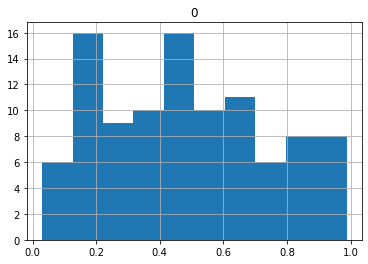

In [94]:
pd.DataFrame(norm.cdf(y)).hist()

stats.kstest(norm.cdf(y), 'uniform')

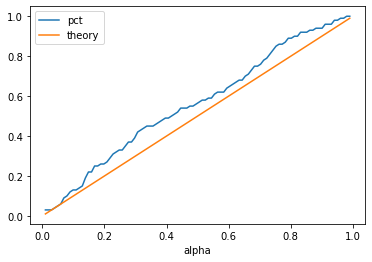

In [96]:
coverage_df = pd.DataFrame(columns = ['alpha','pct','theory']).set_index('alpha')

for alpha in np.linspace(.01,.99,100):
    ci =  scipy.stats.norm.interval(alpha, loc=0, scale=1)
    covered = 0
    
    for value in y:
        if value > ci[0] and value < ci[1]:
            covered = covered  +1
            
    coverage_df.loc[alpha,'pct'] = covered/len(y)
    coverage_df.loc[alpha,'theory'] = alpha
    
coverage_df.plot()

# Misspecified sample

In [110]:
sample_size = 50
#Mixture

# norms = np.random.normal(0,.8,sample_size)
# bigs = np.random.normal(0,2,sample_size)
# mixs = 1*(np.random.uniform(0,1,sample_size) < .1)

# y = mixs * bigs + (1-mixs)*norms

#Extended tails
y = np.random.normal(0,1,sample_size)
y[np.abs(y) > 1] =y[np.abs(y) > 1] + 1

KstestResult(statistic=0.20215965101886413, pvalue=0.0287457424529296)

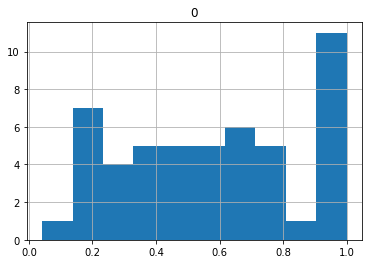

In [111]:
pd.DataFrame(norm.cdf(y)).hist()
stats.kstest(norm.cdf(y), 'uniform')

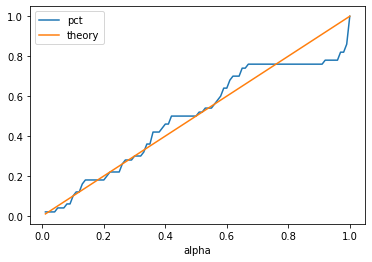

In [116]:
coverage_df = pd.DataFrame(columns = ['alpha','pct','theory']).set_index('alpha')

for alpha in np.linspace(.01,1.0,100):
    ci =  scipy.stats.norm.interval(alpha, loc=0, scale=1)
    covered = 0
    
    for value in y:
        if value > ci[0] and value < ci[1]:
            covered = covered  +1
            
    coverage_df.loc[alpha,'pct'] = covered/len(y)
    coverage_df.loc[alpha,'theory'] = alpha
    
coverage_df.plot()